ДЗ по машинному обучению


Задание 1
Задачи
1. Дана обучающая выборка
x 1 1 0 0 −1
y 4 4 0 2 6

1) изобразить точки;

2) методом наименьших квадратов построить модель вида f(x) = β 0 + β 1 x + β 2 x 2 ;

построить график этой функции;

3) построить модель того же вида методом ридж-регрессии с параметром регуляриза-
ции λ = 1; построить график этой функции.

Замечание: при ручных вычислениях по методу наименьших квадратов рекомен-
дуется составить систему X ⊤ Xβ = X ⊤ y и решить ее. Регуляризованная система:
(X ⊤ X + λI)β = X ⊤ y, где I — единичная матрица.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
x = [1, 1, 0, 0, -1]
Y = [4, 4, 0, 2, 6]

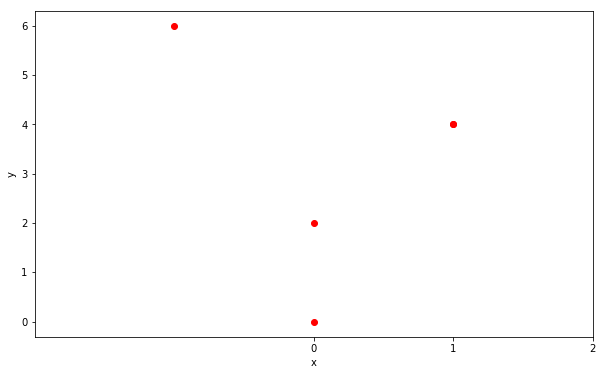

In [3]:
plt.figure(figsize = (10, 6))

plt.scatter(x,
            Y,
            alpha = 1,
            label = 'Points Plot',
            color = 'r')
plt.xticks(range(3))
plt.xlim(-2, 2)
plt.xlabel('x')
plt.ylabel('y')

In [4]:
X = [[1, 1, 1], [1,1,1], [1, 0, 0], [1,0,0], [1,-1,1]]


В матрице Х - первый столбец из 1, второй - вектор х, третий - квадраты элементов вектора х

In [5]:
Xt = np.transpose(X)

In [6]:
Xt

array([[ 1,  1,  1,  1,  1],
       [ 1,  1,  0,  0, -1],
       [ 1,  1,  0,  0,  1]])

Строим систему нормальных уравнений X ⊤ Xβ = X ⊤ y

In [7]:
XtX = np.dot(Xt, X)
XtX

array([[5, 1, 3],
       [1, 3, 1],
       [3, 1, 3]])

In [8]:
y = np.transpose(Y)
Xty = np.dot(Xt, y)
Xty

array([16,  2, 14])

In [16]:
beta =np.linalg.solve(XtX, Xty)
beta

array([ 1., -1.,  4.])

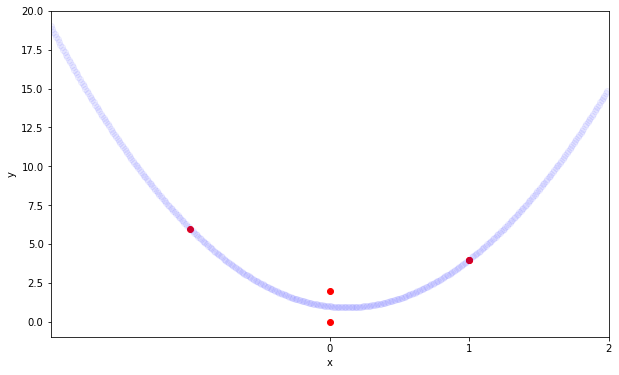

In [18]:
xvals = np.arange(-2, 2, 0.01)
yvals = 1 -1*xvals+4*xvals*xvals
#аппроксимация - 1 -x+4x^2
plt.figure(figsize = (10, 6))

plt.scatter(x,
            Y,
            alpha = 1,
            label = 'Start set',
            color = 'r')

plt.scatter(xvals,
            yvals,
            alpha = 0.05,
            label = 'Least squares',
            color = 'b')
plt.xticks(range(3))
plt.xlim(-2, 2)
plt.xlabel('x')
plt.ylabel('y')

Ридж регрессия
(X ⊤ X + λI)β = X ⊤ y, лямбда = 1

In [11]:
lam = 1
lambdaI = np.ones([3,3]) * lam
lambdaI

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [12]:
XtX_labmdaI = XtX + lambdaI
XtX+lambdaI

array([[ 6.,  2.,  4.],
       [ 2.,  4.,  2.],
       [ 4.,  2.,  4.]])

In [19]:
beta_ridge = np.linalg.solve(XtX_labmdaI, Xty)
beta_ridge


array([ 1.        , -1.66666667,  3.33333333])

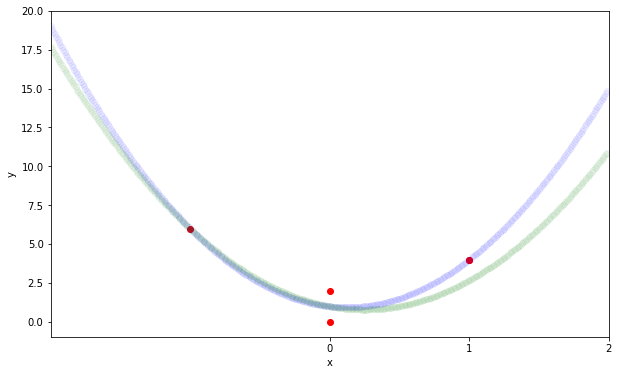

In [20]:
xvals = np.arange(-2, 2, 0.01)
yvals = 1 -1*xvals+4*xvals*xvals
xvals_ridge = np.arange(-2, 2, 0.01)
yvals_ridge =1 -1.66666667*xvals+3.33333333*xvals*xvals
plt.figure(figsize = (10, 6))

plt.scatter(x,
            Y,
            alpha = 1,
            label = 'Start set',
            color = 'r')

plt.scatter(xvals,
            yvals,
            alpha = 0.05,
            label = 'Least squares',
            color = 'b')
plt.scatter(xvals_ridge,
            yvals_ridge,
            alpha = 0.05,
            label = 'Ridge regression',
            color = 'g')
plt.xticks(range(3))
plt.xlim(-2, 2)
plt.xlabel('x')
plt.ylabel('y')